<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E7%94%BB%E5%83%8F%E3%81%8B%E3%82%89%E6%96%87%E5%AD%97%E3%82%92%E8%AA%8D%E8%AD%98%E3%81%99%E3%82%8BOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,803 kB/s)
Selecting previously unselect

In [2]:
!tesseract --list-langs

List of available languages (2):
osd
eng


In [ ]:
!curl -L https://github.com/tesseract-ocr/tessdata/raw/master/jpn.traineddata > jpn.traineddata
!cp jpn.traineddata /usr/share/tesseract-ocr/tessdata

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   145  100   145    0     0   1000      0 --:--:-- --:--:-- --:--:--  1006
100 34.0M  100 34.0M    0     0  86.5M      0 --:--:-- --:--:-- --:--:-- 86.5M


In [ ]:
!apt install tesseract-ocr libtessract-dev tesseract-ocr-jpn
!pip install pyocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libtessract-dev


In [ ]:
from PIL import Image
import sys
import pyocr
import pyocr.builders

In [ ]:
import cv2

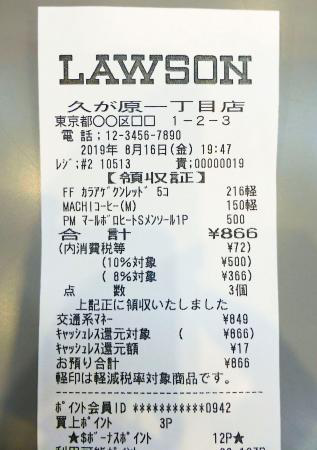

In [ ]:

img1 = Image.open('01.jpg')
img1

In [ ]:
tools =  pyocr.get_available_tools()
tools

[<module 'pyocr.tesseract' from '/usr/local/lib/python3.7/dist-packages/pyocr/tesseract.py'>,
 <module 'pyocr.libtesseract' from '/usr/local/lib/python3.7/dist-packages/pyocr/libtesseract/__init__.py'>]

In [ ]:
len(tools)

2

In [ ]:
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("OCR tool is not found")
    sys.exit(1)

#OCRツール名を表示
tool = tools[0]
print("OCR tool is '%s'" % (tool.get_name()))

OCR tool is 'Tesseract (sh)'


In [ ]:
langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[1]
print("Will use lang '%s'" % (lang))

Available languages: osd, eng
Will use lang 'eng'


In [ ]:
#OCRを行う画像を読み込み
from google.colab import files
f = files.upload()
#読み込んだ画像のファイル名
filename = list(f)[0]

Saving large_PN2019082101001926.-.-.CI0003.jpg to large_PN2019082101001926.-.-.CI0003 (1).jpg


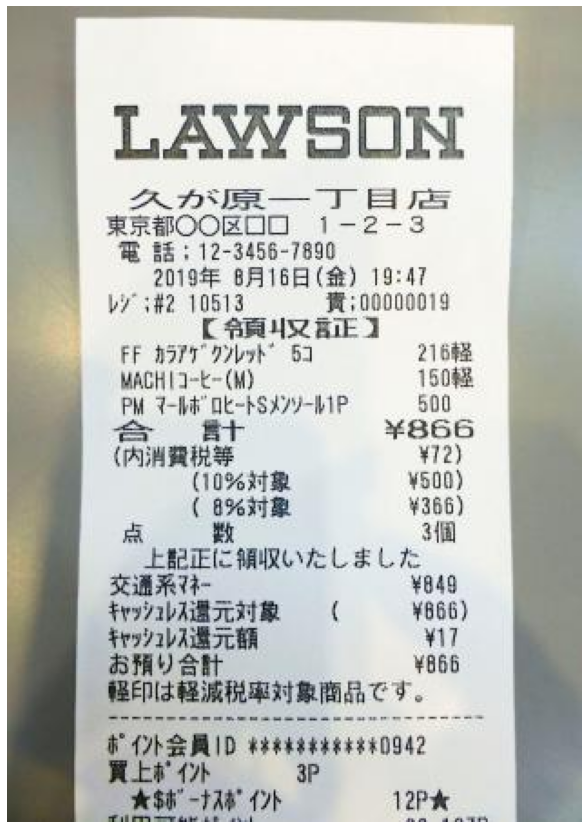

In [ ]:
#読み込んだ画像を表示してみる
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,15))
plt.axis("off")
plt.imshow(img)

In [ ]:
txt = tool.image_to_string(
    Image.open(filename),
    lang="eng",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)
print( txt )

AAVR—T Aes
MRBOOROO 1-2-3
‘® RB; 12-3456-7890
20198 BANGE (Ht) 19:47
vat? 10513 ‘00000019
CABius2 RIED
FF ASP Y Dyy9k* 63 21688
MACH Ia-€~(M) 15088
PM Wi De-BSA7Y-IP- 500
eS at ¥866
(ARE ¥I2)
(0% stm y500)
( 8x ¥366)
a wt af
CERRIFIC ARUN L & Le
SEHR ¥oag
fwnbhaatim = —( ——¥865)
fro VABoch MIT
BRUSH ¥866
BSN RCT.
* yen eee FONN?
Kh 3p
SH TA APR
